In [53]:
import random
import networkx
import networkx as nx
import matplotlib.pyplot as plt
import statistics
from tqdm import tqdm
import time 

In [3]:
class Graph(object):
    
    def __init__(self, size):
        self.nodes = range(size)
        self.edges = []
        self.pos_edges = []
        for i in self.nodes:
            for j in self.nodes:
                if i != j:
                    self.pos_edges.append((i, j))
        self.matrix = []
        for s in range(len(self.nodes)):
            self.matrix.append([s] * len(self.nodes))
            for j in range(len(self.nodes)):
                self.matrix[s][j] = 0
        
    def step(self, func):
        edge = self.pos_edges[random.randint(0, len(self.pos_edges) - 1)]
        self.edges.append(edge) 
        self.matrix[edge[0]][edge[1]] = 1
        self.matrix[edge[1]][edge[0]] = 1
        self.pos_edges.remove(edge)
        self.pos_edges = func(self.edges, self.pos_edges)
                         
    def draw(self):
        g = networkx.Graph(directed=False)
        for node in self.nodes:
            g.add_node(node)
        for edge in self.edges:
            g.add_edge(edge[0], edge[1])
        
        plt.xkcd()
        k = dict(nx.degree(g))
        plt.figure(1, figsize= (10,7))
        coord = nx.spring_layout(g, k = 0.3, iterations = 20)
        nx.draw_networkx(g,
                 pos=coord,
                 nodelist=list(k.keys()),
                 node_size = [10 for d in list(k.values())],
                 #node_color=list(k.values()),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 width = 0.5,
                 with_labels=False)
        plt.show()

In [4]:
def all_func(edges, pos_edges):
    return pos_edges

def pytak(graph):
    for i in range(5):
        graph.step(all_func)
    #graph.draw()
    return graph

In [5]:
first = Graph(10)
for i in range(9):
    first = pytak(first)
    #print(izol(first))


In [6]:
def izol(graph):
    flag = False
    for node_spis in graph.matrix:
        if not 1 in node_spis:
            flag = True
            break
    return flag        

In [38]:
zapusk = range(1, 1001)
result10 = []

for i in tqdm(zapusk):
    example = Graph(10)
    for j in range(45):
        example.step(all_func)
        if not izol(example):
            result10.append(j + 1) 
            break

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 864.00it/s]


In [39]:
zapusk = range(1, 1001)
result100 = []

for i in tqdm(zapusk):
    example = Graph(100)
    for j in range(99 * 50):
        example.step(all_func)
        if not izol(example):
            result100.append(j)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.08it/s]


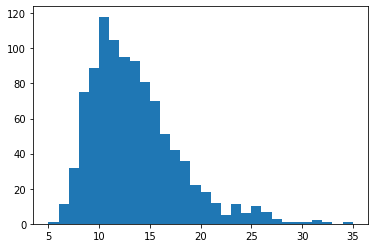

In [40]:
plt.hist(result10, bins = max(result10) - min(result10))
plt.show()

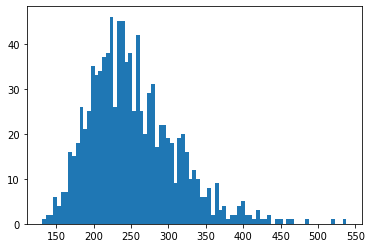

In [41]:
plt.hist(result100, bins = (max(result100) - min(result100))//5)
plt.show()

In [60]:
print(statistics.mean(result100))
print(statistics.median(result100))
print(max(result100), min(result100))

252.595
243.0
538 131


In [7]:
def trio(edges, pos_edges):
    for pos_edge in pos_edges:
        node1 = pos_edge[0]
        node2 = pos_edge[1]
        for edge in edges:
            if node1 in edge:
                if node1 == edge[0]:
                    node3 = edge[1]
                else:
                    node3 = edge[0]
                if (node2, node3) in edges or (node3, node2) in edges:
                    pos_edges.remove(pos_edge)
                    break
            elif node2 in edge:
                if node2 == edge[0]:
                    node3 = edge[1]
                else:
                    node3 = edge[0]
                if (node1, node3) in edges or (node3, node1) in edges:
                    pos_edges.remove(pos_edge)
                    break
    return pos_edges

In [8]:
def trio_f(edges, pos_edges):
    for pos_edge in pos_edges:
        node1 = pos_edge[0]
        node2 = pos_edge[1]
        edge = edges[-1]
        if node1 in edge:
            if node1 == edge[0]:
                node3 = edge[1]
            else:
                node3 = edge[0]
            if (node2, node3) in edges or (node3, node2) in edges:
                pos_edges.remove(pos_edge)
                break
        elif node2 in edge:
            if node2 == edge[0]:
                node3 = edge[1]
            else:
                node3 = edge[0]
            if (node1, node3) in edges or (node3, node1) in edges:
                pos_edges.remove(pos_edge)
                break
    return pos_edges

In [44]:
zapusk = range(1, 1001)
result_3_10 = []

for i in tqdm(zapusk):
    example = Graph(10)
    for j in range(45):
        example.step(trio_f)
        if not izol(example):
            result_3_10.append(j + 1) 
            break

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2359.26it/s]


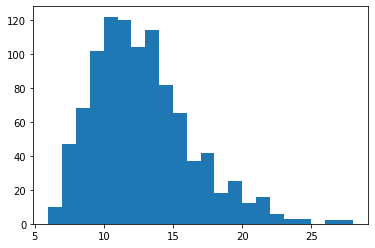

In [45]:
plt.hist(result_3_10, bins = max(result_3_10) - min(result_3_10))
plt.show()

In [62]:
zapusk = range(1, 1001)
result_3_100 = []

for i in tqdm(zapusk):
    example = Graph(100)
    for j in range(99 * 50):
        example.step(trio_f)
        if not izol(example):
            result_3_100.append(j)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:41<00:00,  2.93it/s]


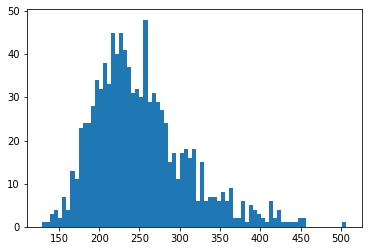

In [63]:
plt.hist(result_3_100, bins = (max(result_3_100) - min(result_3_100))//5)
plt.show()

In [64]:
print(statistics.mean(result_3_100))
print(statistics.median(result_3_100))
print(max(result_3_100), min(result_3_100))

251.371
240.5
507 129


In [63]:
# Import `xlwt` 
import xlwt

# Initialize a workbook 
book = xlwt.Workbook(encoding="utf-8")

# Add a sheet to the workbook 
sheet1 = book.add_sheet("all_10")
sheet2 = book.add_sheet("all_100") 
sheet3 = book.add_sheet("all_1000") 
sheet4 = book.add_sheet("trio_10") 
sheet5 = book.add_sheet("trio_100") 

# Write to the sheet of the workbook
for i in range(1000):
    sheet1.write(i, 0, result10[i])
    sheet2.write(i, 0, result100[i])
    sheet3.write(i, 0, result1000[i])
    sheet4.write(i, 0, result_3_10[i])
    sheet5.write(i, 0, result_3_100[i])

# Save the workbook 
book.save("Momenty.xls")

In [9]:
def find_komponent(tree_matrix, i):
    nodes = [i]
    obrabot = []
    num = 0
    while nodes != obrabot:
        for i in range(len(tree_matrix)):
            if tree_matrix[nodes[num]][i] == 1 and i not in nodes:
                nodes.append(i)
        obrabot.append(nodes[num])
        num += 1
    return nodes

In [25]:
zapusk = range(1, 1001)
result_komp_10 = []

for i in tqdm(zapusk):
    example = Graph(10)
    for j in range(9 * 5):
        example.step(trio)
        if len(find_komponent(example.matrix, 0)) == 10:
            result_komp_10.append(j)
            break

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 730.01it/s]


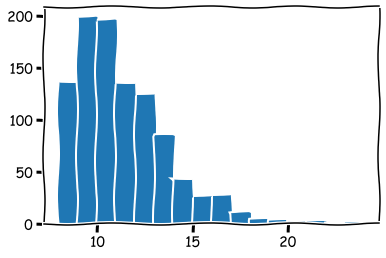

In [26]:
plt.hist(result_komp_10, bins = max(result_komp_10) - min(result_komp_10))
plt.show()

In [32]:
zapusk = range(1, 1001)
result_komp_all_10 = []

for i in tqdm(zapusk):
    example = Graph(10)
    for j in range(9 * 5):
        example.step(all_func)
        if len(find_komponent(example.matrix, 0)) == 10:
            result_komp_all_10.append(j)
            break

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6306.17it/s]


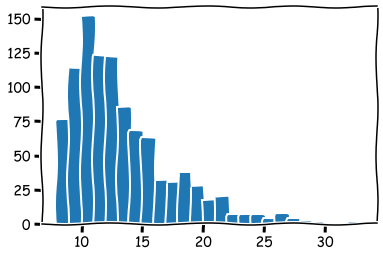

In [33]:
plt.hist(result_komp_all_10, bins = max(result_komp_all_10) - min(result_komp_all_10))
plt.show()

In [65]:
zapusk = range(1, 1001)
result_komp_all_100 = []

for i in tqdm(zapusk):
    example = Graph(100)
    for j in range(99 * 50):
        example.step(all_func)
        if len(find_komponent(example.matrix, 0)) == 100:
            result_komp_all_100.append(j)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:42<00:00,  3.54it/s]


In [66]:
zapusk = range(1, 1001)
result_komp_100 = []

for i in tqdm(zapusk):
    example = Graph(100)
    for j in range(99 * 50):
        example.step(trio_f)
        if len(find_komponent(example.matrix, 0)) == 100:
            result_komp_100.append(j)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:34<00:00,  1.74it/s]


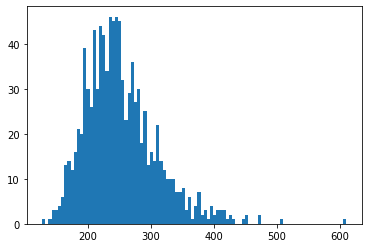

In [67]:
plt.hist(result_komp_all_100, bins = (max(result_komp_all_100) - min(result_komp_all_100))//5)
plt.show()

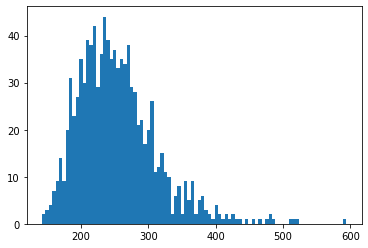

In [68]:
plt.hist(result_komp_100, bins = (max(result_komp_100) - min(result_komp_100))//5)
plt.show()

In [70]:
print(statistics.mean(result_komp_all_100))
print(statistics.median(result_komp_all_100))
print(max(result_komp_all_100), min(result_komp_all_100))
print(statistics.mean(result_komp_100))
print(statistics.median(result_komp_100))
print(max(result_komp_100), min(result_komp_100))

251.975
243.0
610 127
253.668
245.5
594 142


In [21]:
zapusk = range(1, 1001)
result_srav_all_100 = []

for i in tqdm(zapusk):
    example = Graph(100)
    iz = -1
    svyz = -1
    for j in range(99 * 50):
        example.step(all_func)
        if len(find_komponent(example.matrix, 0)) == 100 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_all_100.append(res)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:25<00:00,  3.76it/s]


In [22]:
zapusk = range(1, 1001)
result_srav_3_100 = []

for i in tqdm(zapusk):
    example = Graph(100)
    iz = -1
    svyz = -1
    for j in range(99 * 50):
        example.step(trio_f)
        if len(find_komponent(example.matrix, 0)) == 100 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_3_100.append(res)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:05<00:00,  2.06it/s]


In [23]:
print(sum(result_srav_all_100)/len(result_srav_all_100))
print(sum(result_srav_3_100)/len(result_srav_3_100))

0.961
0.957


In [88]:
zapusk = range(1, 1001)
result_srav_all_10 = []

for i in tqdm(zapusk):
    example = Graph(10)
    iz = -1
    svyz = -1
    for j in range(9 * 5):
        example.step(all_func)
        if len(find_komponent(example.matrix, 0)) == 10 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_all_10.append(res)
            break

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5473.82it/s]


In [89]:
zapusk = range(1, 1001)
result_srav_3_10 = []

for i in tqdm(zapusk):
    example = Graph(10)
    iz = -1
    svyz = -1
    for j in range(9 * 5):
        example.step(trio_f)
        if len(find_komponent(example.matrix, 0)) == 10 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_3_10.append(res)
            break

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1710.52it/s]


In [90]:
print(sum(result_srav_all_10)/len(result_srav_all_10))
print(sum(result_srav_3_10)/len(result_srav_3_10))

0.738
0.744


In [73]:
zapusk = range(1, 1001)
result_srav_all_25 = []

for i in tqdm(zapusk):
    example = Graph(25)
    iz = -1
    svyz = -1
    for j in range(12 * 25):
        example.step(all_func)
        if len(find_komponent(example.matrix, 0)) == 25 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_all_25.append(res)
            break

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 416.38it/s]


In [74]:
zapusk = range(1, 1001)
result_srav_3_25 = []

for i in tqdm(zapusk):
    example = Graph(25)
    iz = -1
    svyz = -1
    for j in range(12 * 25):
        example.step(trio_f)
        if len(find_komponent(example.matrix, 0)) == 25 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_3_25.append(res)
            break

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 146.03it/s]


In [75]:
print(sum(result_srav_all_25)/len(result_srav_all_25))
print(sum(result_srav_3_25)/len(result_srav_3_25))

0.881
0.86


In [76]:
zapusk = range(1, 1001)
result_srav_all_50 = []

for i in tqdm(zapusk):
    example = Graph(50)
    iz = -1
    svyz = -1
    for j in range(49 * 25):
        example.step(all_func)
        if len(find_komponent(example.matrix, 0)) == 50 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_all_50.append(res)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.36it/s]


In [77]:
zapusk = range(1, 1001)
result_srav_3_50 = []

for i in tqdm(zapusk):
    example = Graph(50)
    iz = -1
    svyz = -1
    for j in range(49 * 25):
        example.step(trio_f)
        if len(find_komponent(example.matrix, 0)) == 50 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_3_50.append(res)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.50it/s]


In [78]:
print(sum(result_srav_all_50)/len(result_srav_all_50))
print(sum(result_srav_3_50)/len(result_srav_3_50))

0.926
0.919


In [79]:
zapusk = range(1, 1001)
result_srav_all_200 = []

for i in tqdm(zapusk):
    example = Graph(200)
    iz = -1
    svyz = -1
    for j in range(199 * 100):
        example.step(all_func)
        if len(find_komponent(example.matrix, 0)) == 200 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_all_200.append(res)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [54:43<00:00,  3.28s/it]


In [80]:
zapusk = range(1, 1001)
result_srav_3_200 = []

for i in tqdm(zapusk):
    example = Graph(200)
    iz = -1
    svyz = -1
    for j in range(199 * 100):
        example.step(trio_f)
        if len(find_komponent(example.matrix, 0)) == 200 and svyz == -1:
            svyz = j
        if not izol(example) and iz == -1:
            iz = j
        if svyz != -1 and iz != -1:
            if svyz == iz:
                res = 1
            else:
                res = 0
            result_srav_3_200.append(res)
            break

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:45:56<00:00,  6.36s/it]


In [81]:
print(sum(result_srav_all_200)/len(result_srav_all_200))
print(sum(result_srav_3_200)/len(result_srav_3_200))

0.965
0.976
